<a href="https://colab.research.google.com/github/VitorFRodrigues/Data-Science-Bootcamp/blob/main/Proj05_final/Notebook/Bootcamp_Proj_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Módulo 5 do Bootcamp Data Science 3 - Criação de modelo preditivo para decisão de paciente se encontra apto ou não para ingressar na UTI
---
Autor: Vitor Rodrigues

e-mail: vitorfbaiano@gmail.com

---

## 1.Introdução

Explicar um pouco sobre o problema proposto, a quantidade de dados coletado pelo Sirio Libanes, como e onde estes dados são encontrados.

## 2.Objetivos

Considerando o que foi explanado na introdução, este projeto tem como objetivo a criação de um modelo decisório para ingresso de pacientes na UTI dados certas variárieis. Para isto, serão realizados os seguintes passos:

- Importação dos dados do Sirio Libanês;
- Realização de limpeza dos dados;
- Criação de 5 modelos preditivos;
- Alteração de hiperparametros para atingir melhor acurácia em cada modelo;
- Remover informações correlacionadas que dificultem o poder decisório de cada modelo;
- Aplicar os modelos em novo banco de dados para buscar melhor acurácia;
- Apurar modelo preditivo e salva-lo;

Tipos principais de modelos preditivos:


*   Classificação: escolha booleana (Verdadeiro ou Falso)
*   Regressão: previsão dentro de um intervalo ]-inf,+inf[ 



## 3.Preparação dos dados

Falar do Sirio Libanes e como este levantou estes dados. Informar a metodologia das 

Regras dos dados recebidos
- Alguns itens NaN;
- 384 pacientes (vide numero máximo no PACIENTE_VISIT_IDENTIFIER)
- Cada paciente separado em 5 janelas de tempo (vide coluna Window)

In [1]:
import pandas as pd

Sirio_Libanes_URL = 'https://github.com/VitorFRodrigues/Data-Science-Bootcamp/blob/main/Proj05_final/dados/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true'

In [2]:
dados = pd.read_excel(Sirio_Libanes_URL)
dados

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


dar informações dos dados, numero de linhas e colunas, o que as colunas representam (falar dos 54 tipos), falar que o paciente está subdividido em 5 janelas. Informar a metodologia da janela.

In [3]:
dados[['PATIENT_VISIT_IDENTIFIER', 'WINDOW']].head()

,PATIENT_VISIT_IDENTIFIER,WINDOW
0,0,0-2
1,0,2-4
2,0,4-6
3,0,6-12
4,0,ABOVE_12


puxar o dados.describe(). Informar que este descreve todas as colunas que são do tipo inteira ou categórica

In [4]:
dados.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Mostrar a anomalia q existem apenas 229 colunas do tipo inteiras ou categóricas. Vamos informar quais são as colunas não categorizadas

In [5]:
for coluna in dados.columns:
  if coluna not in dados.describe().columns:
    print(coluna)

AGE_PERCENTIL
WINDOW


In [6]:
dados[['AGE_PERCENTIL', 'WINDOW']]

,AGE_PERCENTIL,WINDOW
0,60th,0-2
1,60th,2-4
2,60th,4-6
3,60th,6-12
4,60th,ABOVE_12
...,...,...
1920,50th,0-2
1921,50th,2-4
1922,50th,4-6
1923,50th,6-12


Informar que a janela window será agrupada posteriormente e por isso não será categorizada. Já a coluna AGE_PERCENTIL indica a.... e será categorizada abaixo:

Para categorizar, existem algumas metodologias:
1. Find and Replace;
2. Label Encoding;
3. One Hot Encoding
4. OriginalEncoder (do Scikit-Learn)
5. OneHotEncoder (do Scikit-Learn)

Será usada a primeira. Para ver como funciona as demais metodologias de categorização, vide [link](https://github.com/VitorFRodrigues/Data-Science-Bootcamp/blob/main/Proj05_final/Notebook/Bootcamp_Proj_05-Metodologias_de_Categorizacao.ipynb).


In [7]:
dados_categorizar = dados['AGE_PERCENTIL']
dados_categorizar.unique()

array(['60th', '90th', '10th', '40th', '70th', '20th', '50th', '80th',
       '30th', 'Above 90th'], dtype=object)

In [8]:
dados_categorizar.value_counts()

20th          215
10th          205
30th          205
40th          200
70th          195
50th          190
80th          190
60th          185
Above 90th    185
90th          155
Name: AGE_PERCENTIL, dtype: int64

In [9]:
substituir = {"60th": 60, 
              "10th": 10, 
              "40th": 40, 
              "70th": 70, 
              "20th": 20, 
              "50th": 50, 
              "80th": 80, 
              "30th": 30,
              "90th": 90, 
              "Above 90th": 100}
dados_categorizado_find_replace = dados_categorizar.replace(substituir)
dados_categorizado_find_replace

0       60
1       60
2       60
3       60
4       60
        ..
1920    50
1921    50
1922    50
1923    50
1924    50
Name: AGE_PERCENTIL, Length: 1925, dtype: int64

A partir deste momento, estamos modificando os dados originais, sendo assim estes serão adicionados em novo dataframe dados_limpos.

In [10]:
dados_limpos = dados
dados_limpos['AGE_PERCENTIL'] = dados_categorizado_find_replace

In [11]:
dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,53.194805,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,28.673479,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,1.000000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Agora temos todas as variaveis categoricas necessárias para aplicação do modelo. Agora podemos tratar os dados. Como já foi explicado, temos 384 pacientes subdivididos em 5 janelas de tempo.

"Se a pessoa ta na UTI eu não posso usar aquela informação. Pára pra pensar em um caso específico, se a pessoa entra no Hospital e já está na UTI, nas 2 primeiras horas já entra na UTI, a gente não pode usar aquele paciente, aquele paciente vai embora por que na primeira leitura ele já está na UTI."

Explicar que não faz sentido usar no nosso projeto aqueles paciente que já se encontram na UTI nas 2 primeiras horas, sendo assim, o código abaixo vai retirar os pacientes que estão na UTI nas 2 primeiras horas

In [12]:
a_remover = dados_limpos.query("WINDOW=='0-2' and ICU==1")['PATIENT_VISIT_IDENTIFIER'].values
dados_limpos = dados_limpos.query('PATIENT_VISIT_IDENTIFIER not in @a_remover')
dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1765.000000,1765.000000,1765.000000,1765.000000,1760.00000,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,...,1053.000000,1103.000000,1111.000000,1108.000000,1108.000000,1112.000000,1053.000000,1103.000000,1111.000000,1765.000000
mean,192.835694,0.456091,52.662890,0.379603,0.11250,0.026136,0.101705,0.021591,0.132955,0.049432,...,-0.721133,-0.775375,-0.892071,-0.796061,-0.729520,-0.819947,-0.733648,-0.776424,-0.891971,0.201133
std,110.481302,0.498209,28.882085,0.485426,0.31607,0.159586,0.302345,0.145385,0.339622,0.216829,...,0.466468,0.308266,0.288869,0.311507,0.402389,0.267913,0.433956,0.306903,0.289193,0.400961
min,0.000000,0.000000,10.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,98.000000,0.000000,30.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,50.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-1.000000,-1.000000,-1.000000,-0.976451,-0.980533,0.000000
75%,289.000000,1.000000,80.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.647275,-0.541827,-0.664947,-0.681582,-0.595796,-0.881390,0.000000
max,384.000000,1.000000,100.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,0.329660,1.000000,1.000000


Pode ser visto que a contagem anterior era 1.925 e agora estamos com 1.765. A diferença é igual a 160 e como temos 5 PATIENT_VISIT_IDENTIFIER para cada paciente, subdividimos o valor por 5 e descobrimos que 32 pacientes foram removidos da lista.

Próximo ponto será manipulação de valores nulos.

In [13]:
is_NaN = dados_limpos.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = dados_limpos[row_has_NaN]
rows_with_NaN.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1290.000000,1290.000000,1290.000000,1290.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,1285.000000,...,578.000000,628.000000,636.000000,633.000000,633.000000,637.000000,578.000000,628.000000,636.000000,1290.000000
mean,192.041085,0.456589,52.627907,0.380620,0.098054,0.021012,0.091829,0.018677,0.124514,0.042802,...,-0.950132,-0.951054,-0.981196,-0.956410,-0.943864,-0.965528,-0.953988,-0.951721,-0.981114,0.124806
std,110.573927,0.498305,28.725060,0.485728,0.297504,0.143479,0.288897,0.135434,0.330295,0.202488,...,0.138757,0.102627,0.041803,0.106839,0.136183,0.082787,0.125805,0.100860,0.043495,0.330627
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,97.250000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,190.500000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
75%,288.750000,1.000000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.952381,-0.979798,-0.986874,-0.976560,-0.986164,-1.000000,-0.952248,-0.979921,0.000000
max,384.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.294118,-0.238095,-0.474747,0.027425,0.092501,-0.417142,0.340502,-0.285468,-0.392004,1.000000


Várias linhas deste DataFrame possui pelo menos uma coluna contendo NaN (Not-a-Number). O código anterior mostra que das 1765 linhas, 1290 possuem um valor nulo em alguma coluna, representando mais de 70% dos dados. Retirar todas estas linhas não faz sentido e nem auxiliará na criação do modelo preditivo. 

Sendo assim, vamos preencher estes valores nulos com informações. Mas não serão qualquer números, vamos separar cada paciente em suas respectivas janelas de tempo e preencher os valores nulos com o mesmo número indicado na linha anterior ou posterior.

 Para melhor exemplificar o que estou falando, vide este [link](https://github.com/VitorFRodrigues/Data-Science-Bootcamp/blob/main/Proj05_final/Notebook/Previs%C3%A3o_de_Incrementos.ipynb).

Fazendo uma varredura do Dataframe e retiro as janelas após primeiro indicativo de entrada na UTI. Ex.:

In [14]:
dados_exemplo = pd.DataFrame([[1, None, 1, 0], [1, 1, 2, 0], [1, None, 3, 1],
                           [2, None, 1, 0], [2, None, 2, 1], [2, 6, 3, 1]
                          ], columns=['usuario', 'medida', 'janela', 'UTI'])
dados_exemplo

,usuario,medida,janela,UTI
0,1,NaN,1,0
1,1,1.0,2,0
2,1,NaN,3,1
3,2,NaN,1,0
4,2,NaN,2,1
5,2,6.0,3,1


In [15]:
dados_exemplo_pos_limpeza = pd.DataFrame([[1, None, 1, 0], [1, 1, 2, 0], [1, None, 3, 1],
                           [2, None, 1, 0], [2, None, 2, 1]
                          ], columns=['usuario', 'medida', 'janela', 'UTI'])
dados_exemplo_pos_limpeza

,usuario,medida,janela,UTI
0,1,NaN,1,0
1,1,1.0,2,0
2,1,NaN,3,1
3,2,NaN,1,0
4,2,NaN,2,1


Fazendo uma varredura do Dataframe e retiro as janelas após primeiro indicativo de entrada na UTI.

In [16]:
varredura = dados_limpos.reset_index()
linhas_a_remover = []
aux = 0
for i in range(0, len(varredura), 5):
  for j in range(0,5):
    aux += varredura['ICU'][i+j]
    if aux > 1:
      linhas_a_remover.append(i+j)
  aux = 0

In [17]:
print(len(linhas_a_remover))
print(len(dados_limpos))

192
1765


In [18]:
dados_limpos.drop(dados_limpos.index[[linhas_a_remover]], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py:4616: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Conforme informado abaixo, as linhas da varredura foram removidas 1765-192=1573

In [19]:
dados_limpos

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


Agora podemos preencher os valores NaN para frente e para trás.

In [20]:
def preenche_tabela (dados):
    features_continuas_colunas = dados.iloc[:, 13:-2].columns
    features_continuas = dados.groupby('PATIENT_VISIT_IDENTIFIER', as_index=False)[features_continuas_colunas].fillna(method='bfill').fillna(method='ffill')
    features_categoricas = dados.iloc[:, :13]
    saida = dados.iloc[:, -2:]
    dados_finais = pd.concat([features_categoricas, features_continuas, saida], ignore_index=True, axis=1)
    dados_finais.columns = dados.columns
    return dados_finais

In [21]:
dados_limpos = preenche_tabela(dados_limpos)
dados_limpos.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,4-6,0
3,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,6-12,0
4,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [22]:
dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1573.000000,1573.000000,1573.000000,1573.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,194.436745,0.425302,50.584870,0.380801,0.101403,0.024235,0.092474,0.018495,0.120536,0.049745,...,-0.829849,-0.848772,-0.930719,-0.859662,-0.817596,-0.875762,-0.833602,-0.849792,-0.930682,0.103624
std,110.802448,0.494546,28.343382,0.485738,0.301958,0.153826,0.289787,0.134775,0.325691,0.217487,...,0.333809,0.251921,0.220481,0.244270,0.318429,0.217787,0.318533,0.250304,0.221216,0.304869
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,99.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,194.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
75%,292.000000,1.000000,70.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.764706,-0.785714,-0.939394,-0.788280,-0.738255,-0.813580,-0.787721,-0.795326,-0.938475,0.000000
max,384.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.941176,0.333333,0.939394,0.695652,0.830052,0.444757,0.806452,0.329660,0.958324,1.000000


Vamos fazer nova verificação da tabela em busca de itens com NaN.

In [23]:
is_NaN = dados_limpos.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = dados_limpos[row_has_NaN]
rows_with_NaN.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.0
mean,199.0,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-8.172043e-01,-0.599662,-0.918403,0.0
std,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.241267e-16,0.000000,0.000000,0.0
min,199.0,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-8.172043e-01,-0.599662,-0.918403,0.0
25%,199.0,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-8.172043e-01,-0.599662,-0.918403,0.0
50%,199.0,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-8.172043e-01,-0.599662,-0.918403,0.0
75%,199.0,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-8.172043e-01,-0.599662,-0.918403,0.0
max,199.0,0.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.823529,-0.595238,-0.919192,-0.608696,-0.607383,-0.790037,-8.172043e-01,-0.599662,-0.918403,0.0


Coforme mostrado, ainda existe 1 paciente com linhas nulas. Vamos retirar esta linha.

In [24]:
dados_limpos = dados_limpos.dropna()
dados_limpos.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,...,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,194.422194,0.426658,50.714286,0.382015,0.101403,0.024235,0.092474,0.018495,0.120536,0.049745,...,-0.829869,-0.849581,-0.930755,-0.860462,-0.818267,-0.876036,-0.833654,-0.850589,-0.930722,0.103954
std,110.978782,0.494750,28.295550,0.486035,0.301958,0.153826,0.289787,0.134775,0.325691,0.217487,...,0.334341,0.251914,0.220832,0.244247,0.318714,0.218080,0.319039,0.250304,0.221568,0.305298
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,99.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,193.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
75%,292.000000,1.000000,70.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.764706,-0.809524,-0.939394,-0.791304,-0.745748,-0.817279,-0.785952,-0.809259,-0.938802,0.000000
max,384.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.941176,0.333333,0.939394,0.695652,0.830052,0.444757,0.806452,0.329660,0.958324,1.000000


Por fim, vamos unificar as janelas de tempo de cada paciente. Em conclusão, vamos utilizar uma única linha para cada paciente, sendo que nesta linha, todos os dados de entrada (x) serão os dados da janela '0-2' e todos os dados de saída (y) serão compilados indicando se o paciente foi ou não para a UTI contando a partir da janela '2-4' em diante

A ideia aqui é produzir um ML que consiga indicar já nas duas primeiras horas se o paciente vai para a UTI ou não. "Quanto antes melhor"

In [25]:
import numpy as np
def prepare_window(rows):
    if(np.any(rows['ICU'])):
        rows.loc[rows['WINDOW']=="0-2", "ICU"] = 1
    return rows.loc[rows['WINDOW']=="0-2"]

In [26]:
dados_limpos = dados_limpos.groupby('PATIENT_VISIT_IDENTIFIER').apply(prepare_window)
dados_limpos

,,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
PATIENT_VISIT_IDENTIFIER,,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
2,10,2,0,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,0-2,1
3,15,3,0,40,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
4,20,4,0,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0-2,0
5,25,5,0,10,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.976190,-0.979798,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0-2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,1900,380,0,40,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
381,1905,381,1,100,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.619048,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.612627,-1.000000,0-2,0
382,1910,382,0,50,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1


## 3.Aplicação de modelos Machine Learning

Agora que temos o nosso conjunto de dados devidamente limpo, vamos aplicar os modelos de ML para solucionar o problema. Antes disso, precisamos separar o conjunto de dados em dados de treino (treinar meu modelo) e dados de teste (para testar meu modelo)

### 3.1.Separação dos dados de treino e teste

Primeiramente iremos separar os dados tratados em um conjunto de entrada (x) e saída (y).
  
*   A saída será basicamente uma matriz coluna contendo os resultados da UTI. 
*   A entrada serão todo o conjunto de dados coletados, com exceção dos dados de saída (UTI) e a coluna WINDOW a qual possui o mesmo valor em todas as linhas. Sendo assim, será necessário retirar as colunas 'ICU' e 'WINDOW' dos dados.

In [53]:
x_columns = dados.columns
y = dados_limpos["ICU"]
x = dados_limpos[x_columns].drop(["ICU","WINDOW"], axis=1)

Para isto utilizamos o Train-Test-Split. Uma biblioteca que separa os dados em aproximadamente 75% dos dados para treino e 25% para testes.

In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

Além disso, esta lib estratifica os dados fazendo com que tenhamos o mesmo percentual de pacientes que foram para UTI tanto no conjunto de treino quanto no conjunto de teste

In [55]:
estratificacao = pd.DataFrame(
    [
     [len(x_train), len(x_test)],
     [len(y_train), len(y_test)],
     [len(x_train)/len(x)*100, len(x_test)/len(x)*100],
     [len(y_train)/len(y)*100, len(y_test)/len(y)*100],
     [y_train.value_counts()[0], y_test.value_counts()[0]],
     [y_train.value_counts()[1], y_test.value_counts()[1]],
     [y_train.value_counts()[0]/y.value_counts()[0]*100, y_test.value_counts()[0]/y.value_counts()[0]*100],
     [y_train.value_counts()[1]/y.value_counts()[1]*100, y_test.value_counts()[1]/y.value_counts()[1]*100],
    ], index=['x', 'y', '%x', '%y', 'y=0', 'y=1', '%y=0', '%y=1'], columns=['Treino', 'Teste']
)
estratificacao

,Treino,Teste
x,264.000000,88.000000
y,264.000000,88.000000
%x,75.000000,25.000000
%y,75.000000,25.000000
y=0,142.000000,47.000000
y=1,122.000000,41.000000
%y=0,75.132275,24.867725
%y=1,74.846626,25.153374


Entretando, esta biblioteca possui um fator randomico em seu kernel. Ou seja, cada vez que a célula [54] for executada, um conjunto aleatório de dados é selecionado para treino e o restante irá para teste.

Para reduzir esta aleatoreidade, podemos treinar e testar o mesmo modelo várias vezes, obtendo assim uma média e intervalo de confiança desejado.  

Entretanto, como podemos avaliar se o modelo estudado é bom o suficiente para utilização?

### 3.2.Métricas para avaliação do modelo de estudo

Bem, para demonstrar os tipos de métricas principais para se aplicar em modelos de ML, vamos precisar criar um modelo genérico apenas a título de exemplificação.

Utilizaremos o modelo classificador simples, o Dummy Classifier

In [68]:
from sklearn.dummy import DummyClassifier

modelo_dummy = DummyClassifier(strategy="most_frequent")
modelo_dummy.fit(x_train,y_train)
y_prediction = modelo_dummy.predict(x_test)

A métrica mais comum de avaliação é a acurácia na qual mede todos os acertos dividido pelo total dos testes

In [69]:
accuracy = sum(y_prediction == y_test)/len(y_test)
accuracy

0.5340909090909091

Ou podemos utilizar a biblioteca accuracy_score

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_prediction)

0.5340909090909091

No entanto, dependendo do modelo, é interessante saber a quantidade de acertos positivos e acertos negativos. Para isto podemos utilizar a árvore de confusão

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


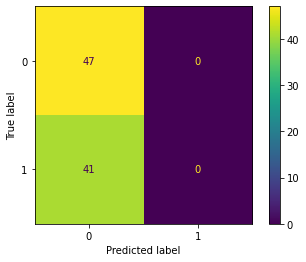

In [71]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

plot_confusion_matrix(modelo_dummy, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


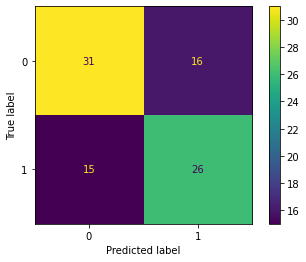

In [72]:
from sklearn.tree import DecisionTreeClassifier

modelo_arvore = DecisionTreeClassifier()
modelo_arvore.fit(x_train, y_train)
predicao_arvore = modelo_arvore.predict(x_test)

plot_confusion_matrix(modelo_arvore, x_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


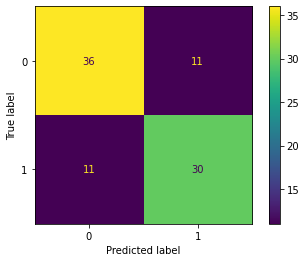

In [74]:
from sklearn.linear_model import LogisticRegression

modelo_logisticReg = LogisticRegression(max_iter=10000)
modelo_logisticReg.fit(x_train, y_train)
predicao_logisticReg = modelo_arvore.predict(x_test)

plot_confusion_matrix(modelo_logisticReg, x_test, y_test)